Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Monday, December 2, 2024**. If you need help (and Google and other resources were not enough) use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary. There may be similar exercises on future sheets. They are intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look up these concepts (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [5]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Assignment 1: Noise and Local Operators (7 points)

In [1]:
import numpy as np
import skimage.data
import imageio.v3 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Getting the Original Image

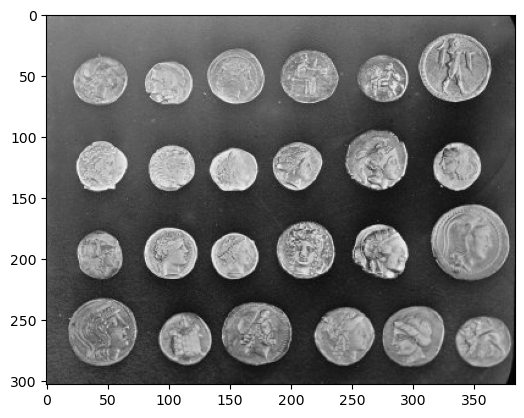

In [2]:
image = skimage.data.coins().astype(np.float64)
plt.imshow(image, cmap="gray")
plt.show()

### a) Salt and Pepper Noise

Add salt and pepper noise to the image.

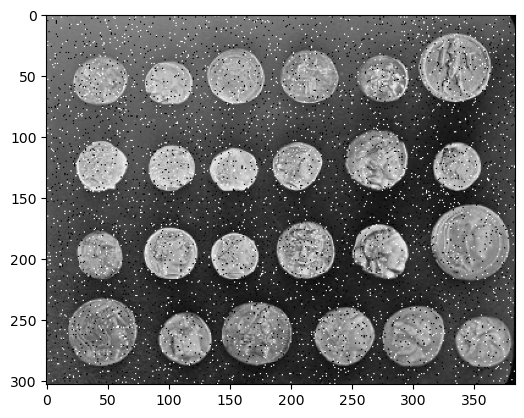

In [3]:
noise_ratio = .05
sp_noisy = image.copy()

# Calculate the number of noisy pixels
total_pixels = image.size
num_noisy = int(total_pixels * noise_ratio)

# Generate random coordinates for salt (white) noise
coords_salt = [np.random.randint(0, i, num_noisy // 2) for i in image.shape]
sp_noisy[coords_salt[0], coords_salt[1]] = 255  # Set pixels to white (salt)

# Generate random coordinates for pepper (black) noise
coords_pepper = [np.random.randint(0, i, num_noisy // 2) for i in image.shape]
sp_noisy[coords_pepper[0], coords_pepper[1]] = 0  # Set pixels to black (pepper)

plt.imshow(sp_noisy, cmap="gray")
plt.show()

### b) Gaussian Noise
Add gaussian noise to the image.

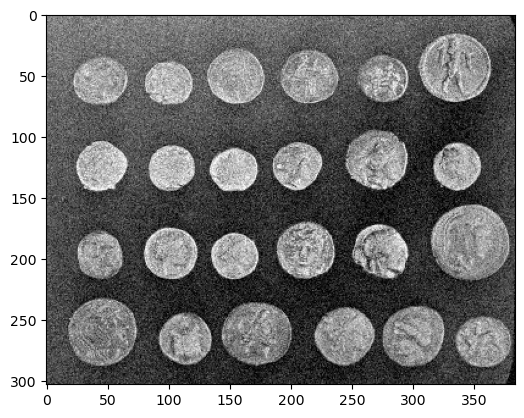

In [4]:
sigma = 20
gauss_noisy = image.copy()

# Generate Gaussian noise
gaussian_noise = np.random.normal(0, sigma, image.shape)  # Mean = 0, StdDev = sigma

# Add the Gaussian noise to the image
gauss_noisy = image + gaussian_noise

# Clip the values to ensure they remain valid pixel intensities
gauss_noisy = np.clip(gauss_noisy, 0, 255).astype(np.uint8)

plt.imshow(gauss_noisy, cmap="gray")
plt.show()

## c) Define Local Operator
In this exercise you will have to finish the local_operator function (cf. CV-04 p. 14).

The function will receive an image (img), kernel size (kernel_size) and a function as parameters.

For each pixel in the image, it will select a window of surrounding pixels according to the kernel_size.

This window is then passed on to the function as an argument.
The function then stores the result in the same position of the resulting image.
Therefore, the function should look similar to this:
```python
# define the function
def f(data):
    """Function to be applied by the local operator. 
    This example just returns 0.0, i.e. a black image.
    
    Args:
        data (np.ndarray): The window of the image as array. 
            Has the same shape as kernel_size, passed to local_operator.
        
    Returns:
        result (float): The value for the pixel at the same position in the resulting image
    """
    return 0.0

# call the local_operator with the function
local_operator(
    image,
    kernel_size=(1,1), 
    function=f,
)
```

In [5]:
def local_operator(img, kernel_size, function):
    """Execute a local operation on an image.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kernel_size (tuple): Shape of the applied window.
        function (function): the function that is applied to the window
        
    Returns:
        result (np.ndarray): The new image after the local operator was applied. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kernel_size
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N), dtype=np.float64)

    # Compute the operation
   # Iterate over each pixel in the input image
    for i in range(M):
        for j in range(N):

                # We extract the window around our current pixel
                # The dimensions are determined by the kernel size, use max() and min() to ensure, that the window stays within the valid indices

                # First ensure that the window stays under the first row, then the bottom to stay above the last row, then the same for columns
                window = img[max(i - mh, 0): min(i + mh + 1, M),
                             max(j - nh, 0):min(j + nh + 1, N)]
                
                # Apply the function to our extracted window
                result[i, j] = function(window)

    return result

As an example, we provide you with an identity filter, which just returns the original image.

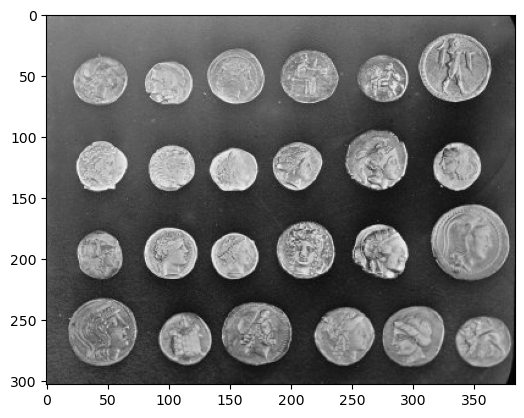

In [6]:
def identity_filter(image):
    return local_operator(
        image,
        kernel_size=(1,1), 
        function=lambda x: x[0][0],
    )
plt.imshow(identity_filter(image), cmap="gray")
plt.show()

### d) Create and apply the following filters:
 - Min Filter (cf. CV-04 slides 23-24)
 - Max Filter (cf. CV-04 slides 23-24)
 - Median Filter (cf. CV-04 slides 25-26)
 - KNN Filter (cf. CV-04 slide 29)
 - SNN Filter (cf. CV-04 slide 30)

Use a kernel_size of `(3, 3)` and for the KNN filter, set K$=4$

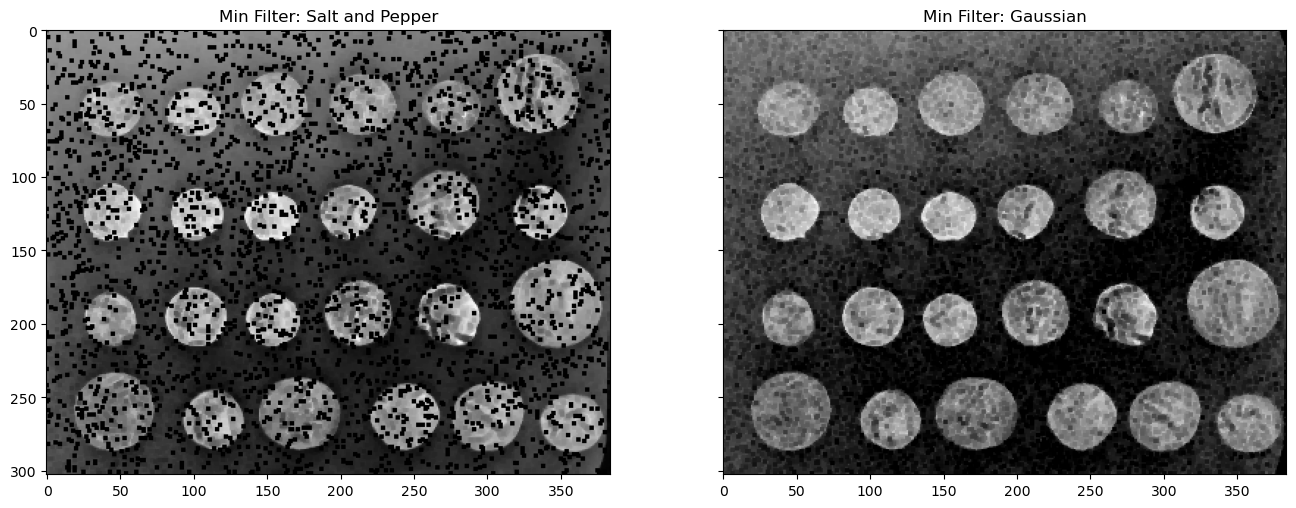

In [7]:
# Create the Min Filter
def min_filter(image):
    return local_operator(
        image,
        kernel_size = (3, 3),
        function = np.min
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(min_filter(sp_noisy), cmap="gray")
ax[0].set_title("Min Filter: Salt and Pepper")

ax[1].imshow(min_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Min Filter: Gaussian")

plt.show()

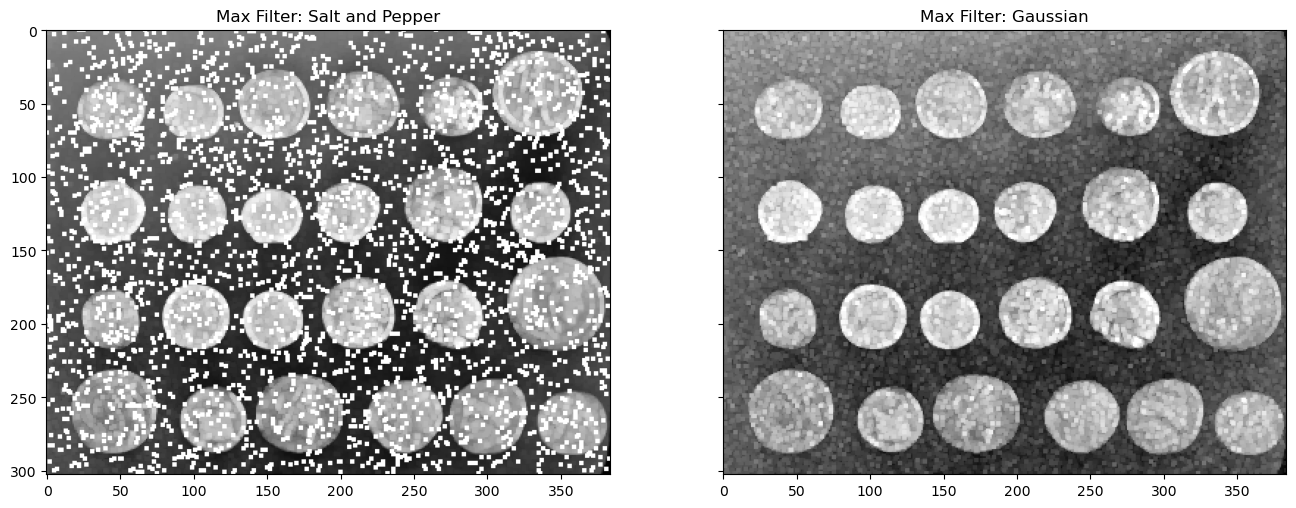

In [8]:
# Create the Max Filter
def max_filter(image):
    return local_operator(
        image,
        kernel_size = (3, 3),
        function = np.max
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(max_filter(sp_noisy), cmap="gray")
ax[0].set_title("Max Filter: Salt and Pepper")

ax[1].imshow(max_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Max Filter: Gaussian")

plt.show()

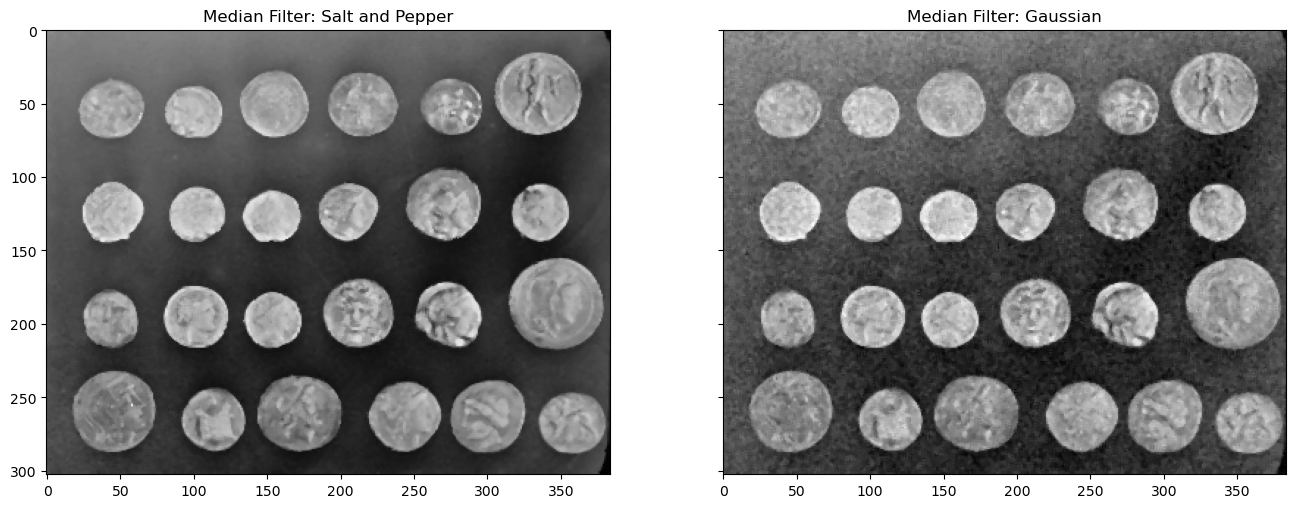

In [9]:
# Create the Median Filter
def median_filter(image):
    return local_operator(
        image,
        kernel_size = (3, 3),
        function = np.median
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(median_filter(sp_noisy), cmap="gray")
ax[0].set_title("Median Filter: Salt and Pepper")

ax[1].imshow(median_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Median Filter: Gaussian")

plt.show()

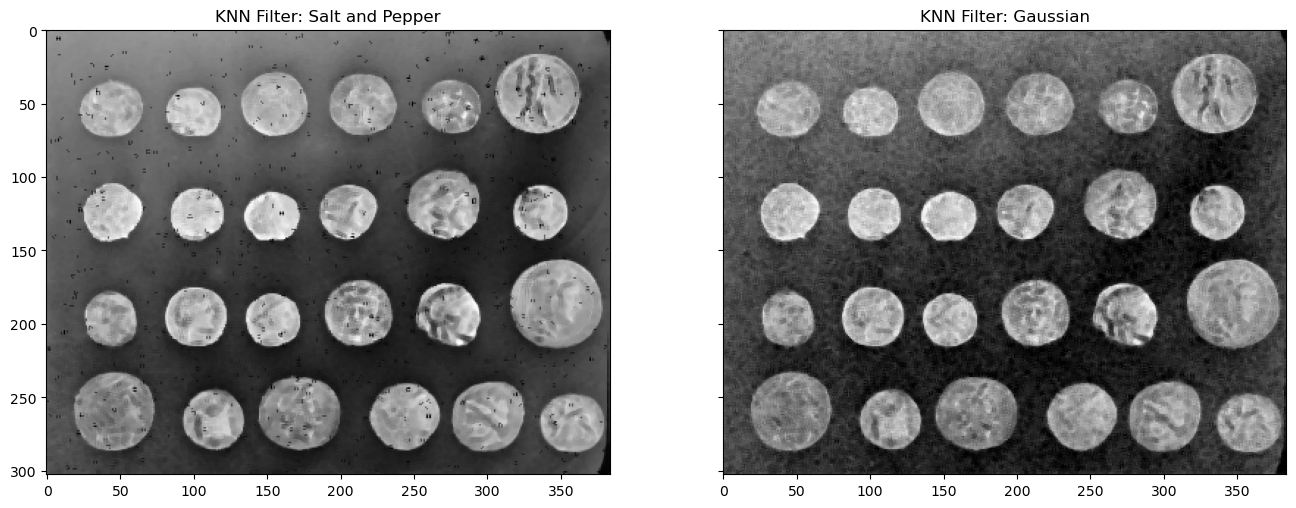

In [13]:
# Before creating the KNN-median-filter, set K=4
def knn_filter_kernel(image, K=4):
    """Get the median of the K=4 nearest neighbors
    
    Args:
        image (np.ndarray): The window of the image (local region) we want to look at
        K (int): The number of nearest neighbors to consider (excluding the center pixel).
    
    Returns:
        float: The median of the K nearest neighbors.
    """
    
    # Flatten the window to make it easier to process
    window = image.flatten()

    # Remove the center pixel (index len(window)//2)
    center_pixel = window[len(window) // 2]
    window = np.delete(window, len(window) // 2)  # Remove the center pixel

    # Sort the remaining pixel values to get the nearest neighbors
    sorted_window = np.sort(window)

    # Take the smallest K values (these are the nearest neighbors)
    knn_values = sorted_window[:K]

    # Return the median value among the K nearest neighbors
    return np.median(knn_values)

# Create the KNN-Filter
def knn_median_filter(image):
    return local_operator(
        image,
        kernel_size = (3, 3),
        function = knn_filter_kernel
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(knn_median_filter(sp_noisy), cmap="gray")
ax[0].set_title("KNN Filter: Salt and Pepper")

ax[1].imshow(knn_median_filter(gauss_noisy), cmap="gray")
ax[1].set_title("KNN Filter: Gaussian")

plt.show()

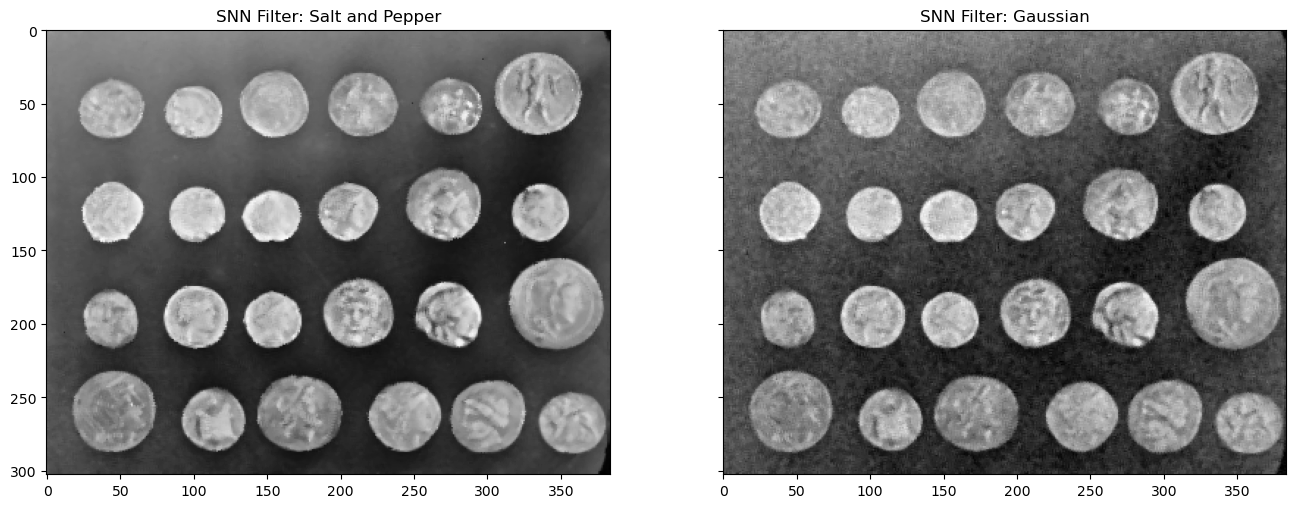

In [12]:
# Before creating the SNN-median-filter
def snn_filter_kernel(image):
    """Get the median of the most similar neighbors
    
    Args:
        image (np.ndarray): The window of the image (local region) we want to look at
        K (int): The number of most similar neighbors to consider
    
    Returns:
        float: The median of the K most similar neighbors.
    """
    
    # Flatten the window to make it easier to process
    window = image.flatten()

    # Get the center pixel
    center_pixel = window[len(window) // 2]
    
    # Calculate the absolute differences between the center pixel and its neighbors
    differences = np.abs(window - center_pixel)
    
    # Remove the center pixel from the differences and the window
    differences = np.delete(differences, len(differences) // 2)
    window = np.delete(window, len(window) // 2)

    # Sort the neighbors by similarity (smallest differences)
    sorted_indices = np.argsort(differences)

    # Select the most similar neighbors based on the smallest differences
    similar_neighbors = window[sorted_indices]

    # Return the median of the K most similar neighbors (could also be the mean)
    return np.median(similar_neighbors)

# Create the SNN-Filter
def snn_median_filter(image):
    return local_operator(
        image,
        kernel_size = (3, 3),
        function = snn_filter_kernel
    )

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(snn_median_filter(sp_noisy), cmap="gray")
ax[0].set_title("SNN Filter: Salt and Pepper")

ax[1].imshow(snn_median_filter(gauss_noisy), cmap="gray")
ax[1].set_title("SNN Filter: Gaussian")

plt.show()

## Assignment 2: Morphological operators (3 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Morphological operators

Explain in your own words the idea of morphological operators. Describe potential applications.

Morphological operators use a small pattern called a structuring element S. It searches the image for (a) specific pattern(s) by moving the element S across the image in small sections. It can help to smooth certain regions and remove noise from the image. It can also fill tiny holes in the image or sharpen edges of certain shapes to better define outlines.

### b) Erosion and dilation

Describe in your own words the morphological operations *erosion* and *dilation*. Compare them with 2D convolution, name commonalities and differences.

Erosion uses a structuring element F which follows the lines inside a figure and "shrinks" the shape into a smaller shape by "cutting" the outer lines. This is helpful so remove noise or tiny objects from the image.

Dilation works somehow similarly but also in the opposite way. It uses a structuring element F again and follows the lines of the figure too, but on the outside instead of the inside. The element F creates new, bigger outlines around the figure. This can be used to fill in gaps between shapes or fill holes.

Erosion and dilation use a matrix that moves across the image in small sections just like 2D convolution does. Moreover, all these operators are used to detect and transform or modify certain patterns. This is done for each pixel and the neighbooring pixels are used to perform the operation.

A difference between erosion/dilation and convolution is the purpose. While erosion and dilation are searching the image for specific shapes in the image and works to shrink or grow them, convolution searches for specific features or textures to smooth or edge things like brightness patterns.
Additionally, Erosion/Dilation works with binary values and for one pixel it checks whether the neighboring pixels and compares them. On the other hand, convolution works with numbers and does not only compare the neighboring pixels but multiplies them and adds them up with regards to the kernel values.

### c) Structuring element

Erosion of an image $g$ with a structuring element $S$ results in an image $g'$ that is a "subset" of that image (in the sense that all pixels set in $g$ are also set in $g'$) as long as the anchor point is contained in $S$, i.e. covered by a **1** in the structuring element. Provide an example in which the erosion $g'=g\ominus S$ lies outside (or partially outside) of $g$.

Input Image g:

$g = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$

This is our binary image where the 1's represent a white square in our image.

Structuring element S:

$S = \begin{bmatrix}
1 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

This is our elements S that gets moved across the image looking at each pixel. the anchor point of our element S is the center value (0). For erosion, this center does not matter and only the pixels around are checked. It checks if all the 1's fit entirely within the white region in g. If they do, the anchor point 0 will be marked in the output image g'.

Resulting Output g':

$g' = \begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
1 & 1 & 1 & 1 & 1 \\
\end{bmatrix}$

In our resulting g', S marks beyond the boundaries of g which results in an extention beoynd the original object in g.


## Assignment 3: Properties of morphological operators (5 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.



### First Identity: $g^{\ast} \oplus S = (g \ominus S)^{\ast}$

#### Left-hand side:
$$(g^{\ast} \oplus S)(x) = \bigvee_{s \in S} g^{\ast}(x - s)$$
Substitute $g^{\ast}(x - s) = \neg g(x - s)$:
$$(g^{\ast} \oplus S)(x) = \bigvee_{s \in S} \neg g(x - s)$$
By De Morgan's law, $\bigvee \neg a = \neg \bigwedge a$:
$$(g^{\ast} \oplus S)(x) = \neg \bigwedge_{s \in S} g(x - s)$$

#### Right-hand side:
$$(g \ominus S)^{\ast}(x) = \neg (g \ominus S)(x)$$
Substitute the definition of erosion:
$$(g \ominus S)(x) = \bigwedge_{s \in S} g(x + s)$$
Thus:
$$(g \ominus S)^{\ast}(x) = \neg \bigwedge_{s \in S} g(x + s)$$

#### Equality:
For the expressions to be equal, note that shifting the structuring element $S$ by $-s$ or $+s$ is symmetric, meaning:
$$\bigwedge_{s \in S} g(x + s) \quad \text{is equivalent to} \quad \bigwedge_{s \in S} g(x - s)$$
So:
$$g^{\ast} \oplus S = (g \ominus S)^{\ast}$$

---

### Second Identity: $g^{\ast} \ominus S = (g \oplus S)^{\ast}$

#### Left-hand side:
$$(g^{\ast} \ominus S)(x) = \bigwedge_{s \in S} g^{\ast}(x + s)$$
Substitute $g^{\ast}(x + s) = \neg g(x + s)$:
$$(g^{\ast} \ominus S)(x) = \bigwedge_{s \in S} \neg g(x + s)$$
By De Morgan's law, $\bigwedge \neg a = \neg \bigvee a$:
$$(g^{\ast} \ominus S)(x) = \neg \bigvee_{s \in S} g(x + s)$$

#### Right-hand side:
$$(g \oplus S)^{\ast}(x) = \neg (g \oplus S)(x)$$
Substitute the definition of dilation:
$$(g \oplus S)(x) = \bigvee_{s \in S} g(x - s)$$
Thus:
$$(g \oplus S)^{\ast}(x) = \neg \bigvee_{s \in S} g(x - s)$$

#### Equality:
As before, the symmetry in shifting the structuring element $S$ ensures:
$$\bigvee_{s \in S} g(x + s) \quad \text{is equivalent to} \quad \bigvee_{s \in S} g(x - s)$$
So:
$$g^{\ast} \ominus S = (g \oplus S)^{\ast}$$

---

### Conclusion
Using logical operators and De Morgan’s laws, the duality properties are proven:
$$g^{\ast} \oplus S = (g \ominus S)^{\ast}, \quad g^{\ast} \ominus S = (g \oplus S)^{\ast}.$$

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming a linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

Dilation computes the maximum, and logical OR is also a maximum operation. Thus:  
  $$
  (g_1 \oplus S) \lor (g_2 \oplus S) = (g_1 \lor g_2) \oplus S
  $$

Erosion computes the minimum, and the logical OR computes the maximum, which do not commute. Thus:  
  $$
  (g_1 \ominus S) \lor (g_2 \ominus S) \ne (g_1 \lor g_2) \ominus S
  $$


### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

### Proof

#### **For Dilation**

Dilation is defined as:
$$
(g \oplus S)(x) = \bigvee_{s \in S} g(x - s)
$$

1. **Associativity**:  
   Sequential dilation with \(S_1\) and \(S_2\) is equivalent to dilating with their combination:  
   $$
   (g \oplus S_1) \oplus S_2 = g \oplus (S_1 \oplus S_2)
   $$

2. **Commutativity**:  
   The order of dilation with \(S_1\) and \(S_2\) does not matter:  
   $$
   (g \oplus S_1) \oplus S_2 = (g \oplus S_2) \oplus S_1
   $$

#### **For Erosion**

Erosion is defined as:
$$
(g \ominus S)(x) = \bigwedge_{s \in S} g(x + s)
$$

1. **Associativity**:  
   Sequential erosion with \(S_1\) and \(S_2\) is equivalent to eroding with their combination:  
   $$
   (g \ominus S_1) \ominus S_2 = g \ominus (S_1 \ominus S_2)
   $$

2. **Commutativity**:  
   The order of erosion with \(S_1\) and \(S_2\) does not matter:  
   $$
   (g \ominus S_1) \ominus S_2 = (g \ominus S_2) \ominus S_1
   $$

---

### Practical Consequences

1. **Simplification of Operations**:  
   Structuring elements can be combined into a single operation, reducing the need for sequential processing:
   $$
   S_1 \oplus S_2 \text{ for dilation or } S_1 \ominus S_2 \text{ for erosion.}
   $$

2. **Flexibility in Order of Operations**:  
   The commutative property allows reordering of operations without affecting the outcome.

3. **Efficient Implementation**:  
   These properties reduce computational complexity when multiple structuring elements are involved.
```

Remark: for the argument to work, we have to assume, that images and structuring elements are large enough and zero-padded. Otherwise it is possible to create counter examples like the following:

In [8]:
import numpy as np
from scipy.ndimage import binary_dilation
a =          np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]])
b2 =          np.array([[0,0,0,0,0], #for this one the rule holds 
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,0,0,0,0]])
b =          np.array([[1,1,1], #for this one it dosen´t
                      [1,1,1],
                      [1,1,1],])
c = b
c2 = b2
d = np.zeros(c.shape, int)
out1 = np.zeros(a.shape, int)
out2 = np.zeros(a.shape, int)
out1 = binary_dilation(binary_dilation(a,b),c)
out2 = binary_dilation(a,binary_dilation(b,c))

print(out1)
print(out2)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]]


## Assignment 4: Custom Structuring Element (5 points)

Landsat 7 was a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: [https://landsat.gsfc.nasa.gov/satellites/landsat-7](https://landsat.gsfc.nasa.gov/satellites/landsat-7)

### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-04, 66ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images.  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


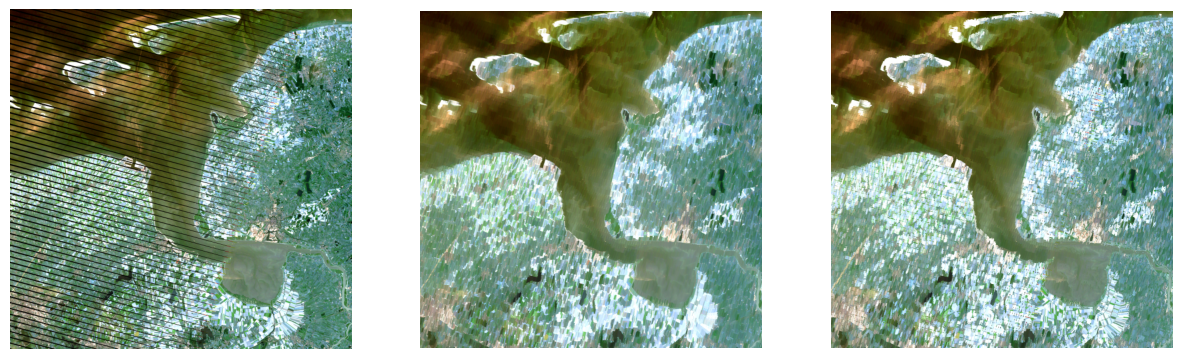

In [10]:
from scipy import ndimage
import os

ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images", "images")
imgs = [plt.imread(os.path.join(IMG_PATH, img)) for img in os.listdir(IMG_PATH)]
img = imgs[0]


def local_operator(frame, kernel_size, function):
    
    k, n = kernel_size[0]//2, kernel_size[1]//2
    res_frame = np.zeros_like(frame[k:, n:])
    
    for c in range(3):
        for i in range(k, frame.shape[0]-k):
            for j in range(n, frame.shape[1]-n):
                curr_frame = frame[i-k:i+1+k,j-n:j+n+1, c]
                res_frame[i-k,j-n, c] = function(curr_frame)
    return res_frame

def local_operator2(frame, kernel_size, function):
    
    k, n = kernel_size[0]//2, kernel_size[1]//2
    res_frame = np.zeros_like(frame[k:, n:])
    coors = []

    for c in range(3):
        for i in range(k, frame.shape[0]-k):
            for j in range(n, frame.shape[1]-n):

                curr_frame = frame[i-k:i+1+k,j-n:j+n+1, c]
                if curr_frame.min() < 0.5:
                    res_frame[i-k,j-n, c] = function(curr_frame)
                else: coors.append([i,j])

    for coors in coors: 
        i,j = coors
        res_frame[i-k,j-n] = frame[i,j]
    return res_frame


img1 = local_operator(ndimage.rotate(img, 15), (7,1), lambda x: x.max())
img2 = local_operator(img1, (7,1), lambda x: x.min())
img3 = ndimage.rotate(img2, -15, reshape=False)[75:-75, 75:-75]

img4 = local_operator2(ndimage.rotate(img, 15), (7,1), lambda x: x.max())
img5 = local_operator2(img4, (7,1), lambda x: x.min())
img6 = ndimage.rotate(img5, -15, reshape=False)[75:-75, 75:-75]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.imshow(img)
ax2.imshow(img3)
ax3.imshow(img6)
ax1.axis("off");
ax2.axis("off");
ax3.axis("off");

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimg
from skimage import color
from skimage.transform import rescale as rescale
from imageio.v3 import imread


angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
raise NotImplementedError()
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)


plt.figure(figsize=(15,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(img3); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.imshow(thresh_img)
plt.show()

FileNotFoundError: No such file: 'c:\Users\moorb\Documents\MyProjects\Code\Repositories\ComputerVision\Homeworks\3\images\landsat_stack2.png'

### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()